# Google Play Apps Rating Predictions

* **What kind of Andriod Apps are most likely to get high ratings?**

![alt text](https://drive.google.com/uc?id=1G82cU_EjAh9UI4htttP8RPSkBM9CdGkb)

## Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
raw = pd.read_csv("/content/drive/My Drive/Home/bibina Google play/googleplaystore.csv")

In [ ]:
raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
data = raw.dropna()

## EDA

### Category

* **First, let's take a look at the top 5 categories with the highest ratings**

In [ ]:
data.groupby('Category').mean().sort_values(by='Rating',ascending=False).head(5)

,Rating
Category,
EVENTS,4.435556
EDUCATION,4.389032
ART_AND_DESIGN,4.377049
BOOKS_AND_REFERENCE,4.346067
PERSONALIZATION,4.335256


Text(0.5, 1.0, 'Distribution of Ratings in Each Category')

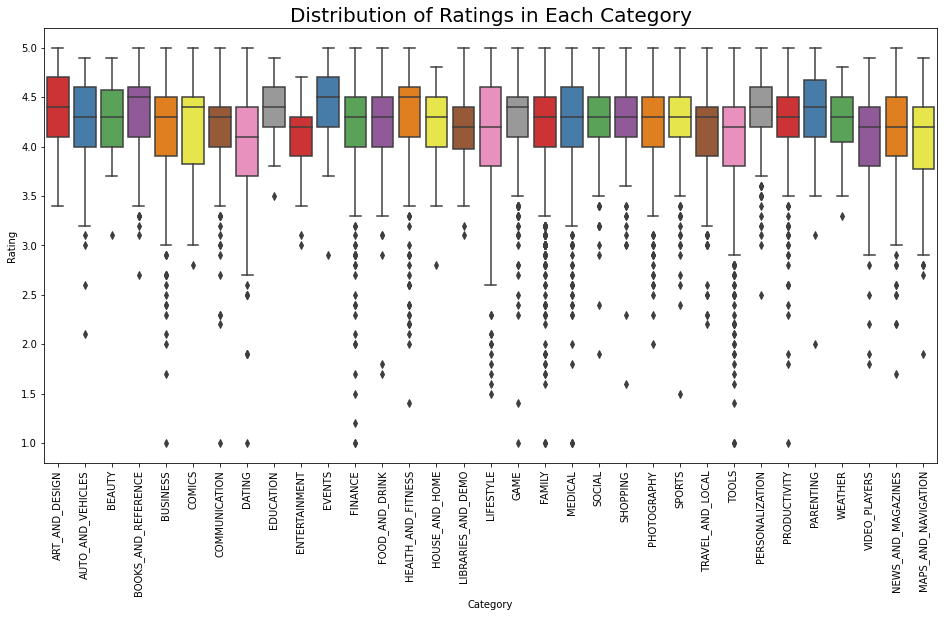

In [ ]:
plt.figure(figsize=(16,8))
fig = sns.boxplot(x="Category",y="Rating",data=data,palette = "Set1")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.title('Distribution of Ratings in Each Category',fontsize = 20)

* **From this box plot, we can see that the ratings of "Events" and "Education" categories are all pretty steady. Even the lowest rating is above 3.5.**
* **Ratings of "Business", "Dating", "Finance", "Lifestyle" and "Tools" categories vary a lot.**

### Reviews

In [ ]:
pd.to_numeric(data.Reviews)

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int64

Text(0.5, 1.0, 'Rating vs Reviews')

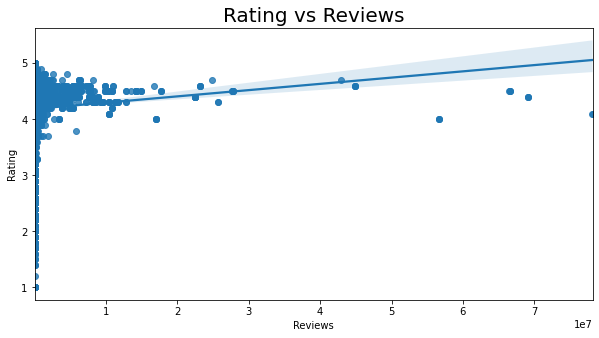

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x=pd.to_numeric(data.Reviews),y=data.Rating,data=data)
plt.title('Rating vs Reviews',fontsize = 20)

* **Reviews seem to be slightly correlated to ratings. More reviews, higher ratings.**

### Size

* **Take a rough look at the range of size.**

In [ ]:
data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

* **Change 'k','M' and 'Varies with device' with numbers**




In [ ]:
data.Size.replace({'Varies with device':np.nan},regex=True,inplace=True)
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [1, 1000]).astype(int))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Rating vs Size')

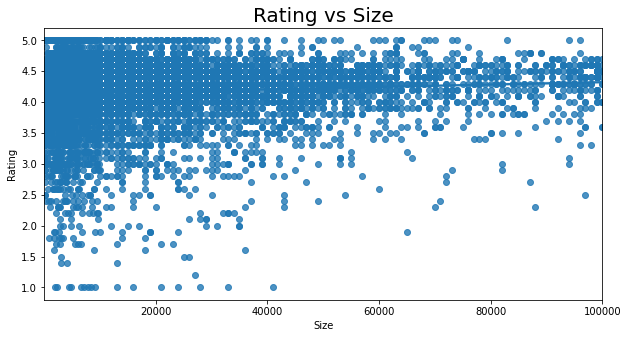

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x=pd.to_numeric(data.Size),y=data.Rating,data=data)
plt.title('Rating vs Size',fontsize = 20)

* **Size seems seldomly affect ratings, but apps with larger size have higher ratings on average.**

### Installs

In [ ]:
data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
ins = data.groupby('Installs').mean()

Text(0.5, 1.0, 'Ratings vs Install Times')

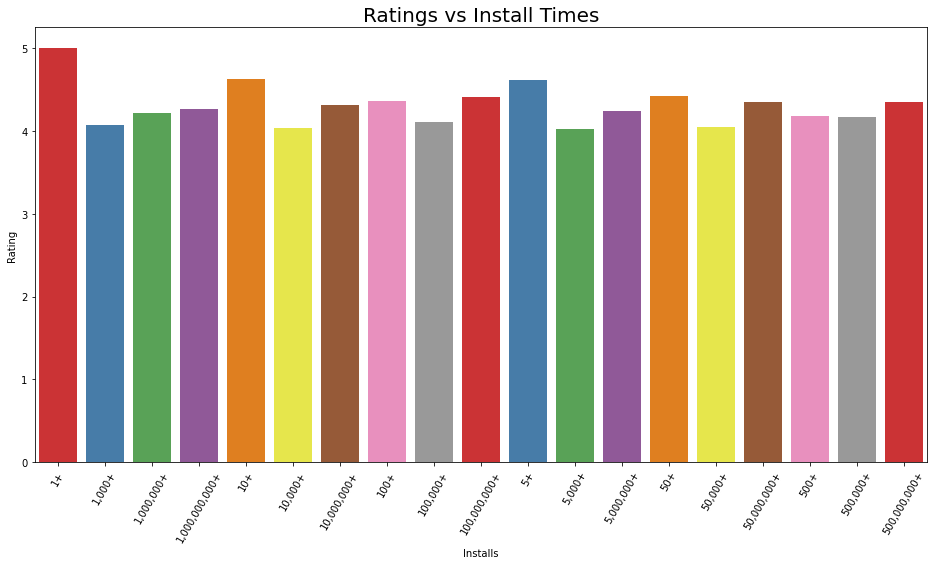

In [ ]:
plt.figure(figsize=(16,8))
fig = sns.barplot(x=ins.index,y=ins['Rating'],data=data,palette = "Set1")
fig.set_xticklabels(fig.get_xticklabels(),rotation=60)
plt.title('Ratings vs Install Times',fontsize = 20)

* **Apps with very few installs as well as very large number of installs have relatively higher ratings.**

### Price

In [ ]:
data.Price = data.Price.replace(r'[$]+', '', regex=True).astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Rating vs Price')

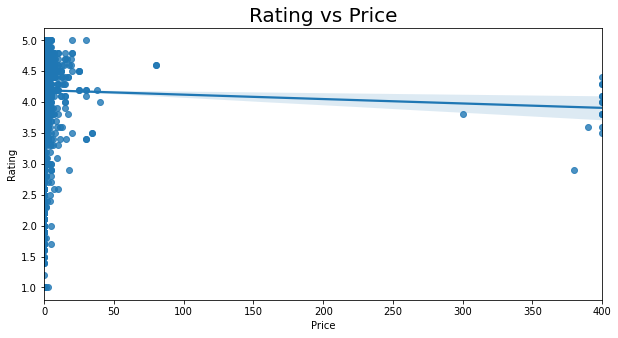

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x=data.Price,y=data.Rating)
plt.title('Rating vs Price',fontsize = 20)

Text(0.5, 1.0, 'Rating vs Price(less than $50)')

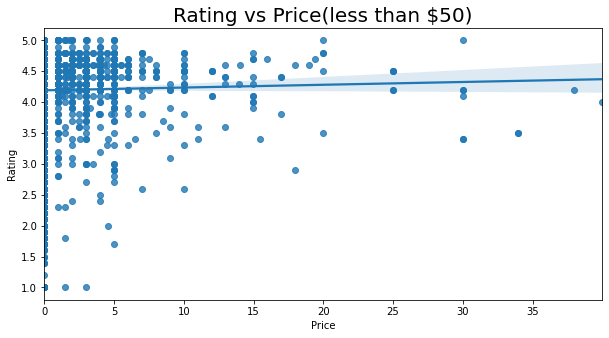

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price',y='Rating',data=data[data.Price<=50])
plt.title('Rating vs Price(less than $50)',fontsize = 20)

* **Apps with higher price tend to have higher ratings. But there are also a lot of free apps getting full star ratings. Let's take a look at them.**

In [ ]:
fivestar = data[(data.Price==0)&(data.Rating==5.0)]

In [ ]:
fivestar.shape

(246, 13)

Text(0.5, 1.0, '5 Star Free Apps in Each Category ')

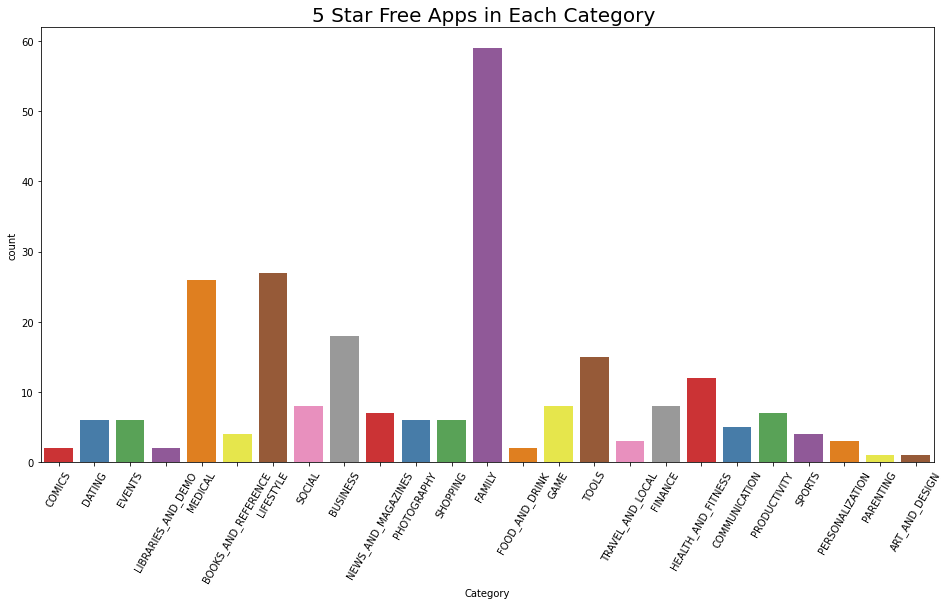

In [ ]:
plt.figure(figsize=(16,8))
fig = sns.countplot(x='Category', data=fivestar,palette='Set1')
fig.set_xticklabels(fig.get_xticklabels(),rotation=60)
plt.title('5 Star Free Apps in Each Category ',fontsize = 20)

* **There are nearly 60 five star free apps in "Family" category. "Medical" and "Lifestyle" category also did pretty well.**

## Predictive Analysis



> **From previous analysis, I found that around 1500 ratings were missing. So, next, I'm going to use other complete rows of information to predict those missing ratings.**



### Feature Engineering

**Now, it's time to choose useful features for predicting models. I will drop some columns including:**
* **App: ID like, should be excluded from the data**
* **Last Updated: Intuition. Seem have nothing to do with Ratings**
* **Current Ver: not consistent**
* **Type: provide replicated information with Price**
* **Genres: provide replicated information with Category**

In [ ]:
raw.drop(['App','Last Updated','Current Ver','Type','Genres'],axis=1,inplace=True)

In [ ]:
raw = raw[raw.Size!='1,000+']

In [ ]:
raw=raw[raw.Size!='Varies with device']
raw.Size = (raw.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             raw.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [1, 1000]).astype(int))

In [ ]:
raw.Reviews = pd.to_numeric(raw.Reviews)

* **Divide features into numerical and categorical ones.**

In [ ]:
num_col = [cname for cname in raw.columns if raw[cname].dtype in ['int64','float64']]

In [ ]:
cat_col = [cname for cname in raw.columns if raw[cname].dtype=='object']

In [ ]:
cat_col

['Category', 'Installs', 'Price', 'Content Rating', 'Android Ver']

In [ ]:
num_col

['Rating', 'Reviews', 'Size']

* **Perform One Hot Encoding on categorical variables.**

In [ ]:
raw.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Android Ver
0,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",0,Everyone,4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",0,Everyone,4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",0,Everyone,4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",0,Teen,4.2 and up
4,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",0,Everyone,4.4 and up


In [ ]:
new = pd.get_dummies(raw, prefix=cat_col, drop_first=True)

In [ ]:
new

,Rating,Reviews,Size,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Installs_1+,"Installs_1,000+","Installs_1,000,000+","Installs_1,000,000,000+",Installs_10+,...,Price_$9.00,Price_$9.99,Price_0,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Android Ver_1.5 and up,Android Ver_1.6 and up,Android Ver_2.0 and up,Android Ver_2.0.1 and up,Android Ver_2.1 and up,Android Ver_2.2 - 7.1.1,Android Ver_2.2 and up,Android Ver_2.3 and up,Android Ver_2.3.3 and up,Android Ver_3.0 and up,Android Ver_3.1 and up,Android Ver_3.2 and up,Android Ver_4.0 and up,Android Ver_4.0.3 - 7.1.1,Android Ver_4.0.3 and up,Android Ver_4.1 - 7.1.1,Android Ver_4.1 and up,Android Ver_4.2 and up,Android Ver_4.3 and up,Android Ver_4.4 and up,Android Ver_4.4W and up,Android Ver_5.0 - 6.0,Android Ver_5.0 - 7.1.1,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device
0,4.1,159,19000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,NaN,0,9600.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10836,4.5,38,53000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10837,5.0,4,3600.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10838,NaN,3,9500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* **Set target variable: Rating**

In [ ]:
#filter out the test set
test = new[new.Rating.isna()]

In [ ]:
label = new.Rating.dropna()

In [ ]:
label

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10833    4.8
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: Rating, Length: 7729, dtype: float64

In [ ]:
data = new.dropna().drop('Rating',axis=1)

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

* **Standard Scaler**

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

* **Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, label, test_size=0.2, random_state=101)

* **XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
def getAccuracy_cv(model):
    
    model.fit(X_train,y_train)
    # get predictions
    preds = model.predict(X_test)
    # cross validation
    from sklearn.model_selection import cross_val_score
    scores = -1 * cross_val_score(model,X,label,cv=10,scoring = 'neg_mean_absolute_error')
    print(scores.mean())

In [ ]:
# Hyperparameter Tuning
paraList = [500, 1000, 1500]
for i in paraList:
  model =XGBRegressor( 
  learning_rate =0.1,
  n_estimators=i,
  max_depth=5,
  min_child_weight=1,
  gamma=0,
  subsample=0.8,
  colsample_bytree=0.8,
  nthread=4,
  scale_pos_weight=1,
  seed=27)
  getAccuracy_cv(model)

[18:08:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
final_model =XGBRegressor( 
  learning_rate =0.1,
  n_estimators=500,
  max_depth=5,
  min_child_weight=1,
  gamma=0,
  subsample=0.8,
  colsample_bytree=0.8,
  nthread=4,
  scale_pos_weight=1,
  seed=27)
getAccuracy_cv(final_model)

[18:28:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:29:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:29:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Predict

* **Repeat the preprocessing steps on test data**

In [ ]:
test = test.drop('Rating',axis=1)
test.head()

,Reviews,Size,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Installs_1+,"Installs_1,000+","Installs_1,000,000+","Installs_1,000,000,000+",Installs_10+,"Installs_10,000+",...,Price_$9.00,Price_$9.99,Price_0,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Android Ver_1.5 and up,Android Ver_1.6 and up,Android Ver_2.0 and up,Android Ver_2.0.1 and up,Android Ver_2.1 and up,Android Ver_2.2 - 7.1.1,Android Ver_2.2 and up,Android Ver_2.3 and up,Android Ver_2.3.3 and up,Android Ver_3.0 and up,Android Ver_3.1 and up,Android Ver_3.2 and up,Android Ver_4.0 and up,Android Ver_4.0.3 - 7.1.1,Android Ver_4.0.3 and up,Android Ver_4.1 - 7.1.1,Android Ver_4.1 and up,Android Ver_4.2 and up,Android Ver_4.3 and up,Android Ver_4.4 and up,Android Ver_4.4W and up,Android Ver_5.0 - 6.0,Android Ver_5.0 - 7.1.1,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device
23,61,7000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
113,182,5700.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
123,119,3700.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
126,654,7400.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129,77,2900.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
